# Decision Tree 

Decision trees are a common and powerful prediction approach.

They are popular because the final model is so easy to understand. The final decision tree can explain why a specific prediction was made, making it attractive for use. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. More complex ensemble approaches like random forests are built on top of decision trees.

In this project, we will learn how to create a decision tree.

1. Import necessary libraries.
2. Import datset and view its shape.
3. Define the feature attribute and target attribute.
4. Spliting the dataset 80% for training, and 20% for testing the classifier.
5. Using entropy and gini index to measure the quality of a split and fit the data.
6. Making predictions on test data.
7. Calculating accuracy.
8. Calculating the confusion matrix.
9. Decision tree visualization.

In [1]:
#Importing necessary libraries 

import pandas as pd  
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
# import the dataset

data = pd.read_csv("wine.csv")
# checking the dimensions of the data
print(data.shape)
# To see first 5 rows of the dataset
data.head()

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
# columns present in the dataset
data.columns 

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [4]:
# define the feature as well as the target datasets / columns
feature_col = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium','Total_Phenols', 
               'Flavanoids', 'Nonflavanoid_Phenols','Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
features = data[feature_col]
label = data.Customer_Segment

In [5]:
# Split the given data into 80 percent training data and 20 percent testing data
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [6]:
#Fit the given data
model_tree = DecisionTreeClassifier(criterion = 'entropy')
model_tree = model_tree.fit(x_train, y_train)

In [7]:
#Make prediction on the test data
ypred_entropy = model_tree.predict(x_test)

In [8]:
# percentage of accuracy
print(metrics.accuracy_score(y_test, ypred_entropy))

0.8888888888888888


In [9]:
# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_entropy))

[[ 9  0  0]
 [ 2 12  1]
 [ 0  1 11]]


[Text(0.5, 0.9166666666666666, 'X[12] <= 755.0\nentropy = 1.562\nsamples = 142\nvalue = [50, 56, 36]'),
 Text(0.2, 0.75, 'X[9] <= 3.825\nentropy = 1.078\nsamples = 88\nvalue = [2, 55, 31]'),
 Text(0.1, 0.5833333333333334, 'entropy = 0.0\nsamples = 48\nvalue = [0, 48, 0]'),
 Text(0.3, 0.5833333333333334, 'X[6] <= 1.385\nentropy = 0.941\nsamples = 40\nvalue = [2, 7, 31]'),
 Text(0.2, 0.4166666666666667, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(0.4, 0.4166666666666667, 'X[0] <= 13.175\nentropy = 1.157\nsamples = 10\nvalue = [2, 7, 1]'),
 Text(0.3, 0.25, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.5, 0.25, 'X[6] <= 2.1\nentropy = 0.918\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.4, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.8, 0.75, 'X[6] <= 2.165\nentropy = 0.575\nsamples = 54\nvalue = [48, 1, 5]'),
 Text(0.7, 0.5833333333333334, 'X[6] <= 1.46

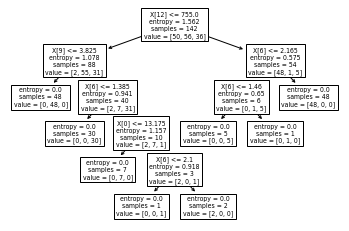

In [10]:
tree.plot_tree(model_tree)

The tree can also be exported in textual format with the function export_text. This method doesn’t require the installation of external libraries and is more compact:

In [11]:
from sklearn.tree import export_text
r = export_text(model_tree, feature_names=feature_col)
print(r)

|--- Proline <= 755.00
|   |--- Color_Intensity <= 3.82
|   |   |--- class: 2
|   |--- Color_Intensity >  3.82
|   |   |--- Flavanoids <= 1.38
|   |   |   |--- class: 3
|   |   |--- Flavanoids >  1.38
|   |   |   |--- Alcohol <= 13.17
|   |   |   |   |--- class: 2
|   |   |   |--- Alcohol >  13.17
|   |   |   |   |--- Flavanoids <= 2.10
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Flavanoids >  2.10
|   |   |   |   |   |--- class: 1
|--- Proline >  755.00
|   |--- Flavanoids <= 2.17
|   |   |--- Flavanoids <= 1.46
|   |   |   |--- class: 3
|   |   |--- Flavanoids >  1.46
|   |   |   |--- class: 2
|   |--- Flavanoids >  2.17
|   |   |--- class: 1



0.8333333333333334
[[ 9  0  0]
 [ 3 10  2]
 [ 0  1 11]]


[Text(0.6071428571428571, 0.9285714285714286, 'X[12] <= 755.0\ngini = 0.656\nsamples = 142\nvalue = [50, 56, 36]'),
 Text(0.35714285714285715, 0.7857142857142857, 'X[11] <= 2.115\ngini = 0.485\nsamples = 88\nvalue = [2, 55, 31]'),
 Text(0.21428571428571427, 0.6428571428571429, 'X[10] <= 0.935\ngini = 0.245\nsamples = 35\nvalue = [0, 5, 30]'),
 Text(0.14285714285714285, 0.5, 'X[6] <= 1.58\ngini = 0.062\nsamples = 31\nvalue = [0, 1, 30]'),
 Text(0.07142857142857142, 0.35714285714285715, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]'),
 Text(0.21428571428571427, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.2857142857142857, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.5, 0.6428571428571429, 'X[8] <= 0.82\ngini = 0.108\nsamples = 53\nvalue = [2, 50, 1]'),
 Text(0.42857142857142855, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5714285714285714, 0.5, 'X[12] <= 726.5\ngini = 0.074\nsamples = 52\nvalue = [2, 50, 0]'),
 Text(0.5, 0.35

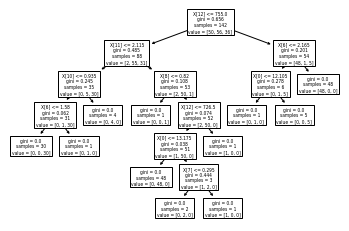

In [12]:
# Using gini index

#Fit the given data
tree1 = DecisionTreeClassifier()
tree1 = tree1.fit(x_train, y_train)

#Make prediction on the test data
ypred_gini = tree1.predict(x_test)

# percentage of accuracy
print(metrics.accuracy_score(y_test, ypred_gini))
#print(f'accuracy obtained is {metrics.accuracy_score(y_test, ypred_gini)*100:.2f}%')

# confusion matrix
print(metrics.confusion_matrix(y_test, ypred_gini))

# to visualize the decision tree
tree.plot_tree(tree1)

Decision Tree Regressor

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

In [14]:
housing = fetch_california_housing()

In [15]:
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = pd.DataFrame(housing.target, columns=["target"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 3)
model = model.fit(X_train, y_train)

In [16]:
y_pred = model.predict(X_test)
print(metrics.r2_score(y_test, y_pred))

0.5154009459642457


[Text(0.5, 0.875, 'X[0] <= 5.086\nsquared_error = 1.325\nsamples = 16512\nvalue = 2.066'),
 Text(0.25, 0.625, 'X[0] <= 3.071\nsquared_error = 0.834\nsamples = 13149\nvalue = 1.74'),
 Text(0.125, 0.375, 'X[2] <= 4.335\nsquared_error = 0.552\nsamples = 6262\nvalue = 1.353'),
 Text(0.0625, 0.125, 'squared_error = 0.671\nsamples = 2708\nvalue = 1.614'),
 Text(0.1875, 0.125, 'squared_error = 0.369\nsamples = 3554\nvalue = 1.153'),
 Text(0.375, 0.375, 'X[5] <= 2.373\nsquared_error = 0.831\nsamples = 6887\nvalue = 2.092'),
 Text(0.3125, 0.125, 'squared_error = 1.312\nsamples = 1595\nvalue = 2.777'),
 Text(0.4375, 0.125, 'squared_error = 0.502\nsamples = 5292\nvalue = 1.886'),
 Text(0.75, 0.625, 'X[0] <= 6.818\nsquared_error = 1.202\nsamples = 3363\nvalue = 3.341'),
 Text(0.625, 0.375, 'X[5] <= 2.578\nsquared_error = 0.873\nsamples = 2289\nvalue = 2.929'),
 Text(0.5625, 0.125, 'squared_error = 1.02\nsamples = 638\nvalue = 3.583'),
 Text(0.6875, 0.125, 'squared_error = 0.586\nsamples = 1651\nva

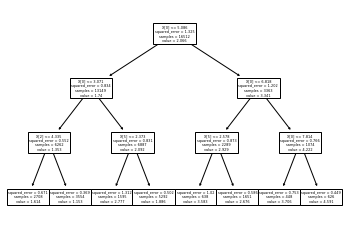

In [17]:
tree.plot_tree(model)

In [18]:
# https://scikit-learn.org/stable/datasets.html (list of availbale sklean dataset)

In [19]:
# https://scikit-learn.org/stable/modules/tree.html (Decision tree )